In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import integrate, optimize, signal

In [2]:
data_dir = 'data/prior'

os.listdir(data_dir)

['.DS_Store', 'm1.0Y0.26FeH0.0MLT2.1ov0.003556dif1']

In [3]:
track_name = 'm1.0Y0.26FeH0.0MLT2.1ov0.003556dif1'

index_filename = 'profiles.index'
data = np.loadtxt(os.path.join(data_dir, track_name, index_filename), dtype=int, skiprows=1)
index_cols = ['model_number', 'priority', 'profile_number']
index = pd.DataFrame(data, columns=index_cols)
index.head()

,model_number,priority,profile_number
0,1,2,1
1,150,3,2
2,151,2,3
3,152,1,4
4,153,1,5


In [4]:
profile_dir = 'profiles'
profiles = os.listdir(os.path.join(data_dir, track_name, profile_dir))
profiles = [p for p in profiles if p.endswith('GYRE')]
profile_num = [int(p.split('.')[0].strip('profile')) for p in profiles]
data = [[i, j] for i, j in zip(profile_num, profiles)]
filenames = pd.DataFrame(data, columns=['profile_number', 'filename'])
filenames.head()

,profile_number,filename
0,92,profile92.data.GYRE
1,1167,profile1167.data.GYRE
2,284,profile284.data.GYRE
3,767,profile767.data.GYRE
4,551,profile551.data.GYRE


In [5]:
index.merge(filenames, on='profile_number')

,model_number,priority,profile_number,filename
0,1,2,1,profile1.data.GYRE
1,150,3,2,profile2.data.GYRE
2,151,2,3,profile3.data.GYRE
3,152,1,4,profile4.data.GYRE
4,153,1,5,profile5.data.GYRE
...,...,...,...,...
1353,2092,1,1354,profile1354.data.GYRE
1354,2094,1,1355,profile1355.data.GYRE
1355,2096,1,1356,profile1356.data.GYRE
1356,2098,1,1357,profile1357.data.GYRE


In [6]:
history_filename = 'history.data'
history = pd.read_table(os.path.join(data_dir, track_name, history_filename), delimiter='\s+')
history.head()

,model_number,num_zones,star_age,time_step,star_mass,log_xmstar,star_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,acoustic_radius,total_angular_momentum,core_overshoot_Hp,core_overshoot_f,core_overshoot_f0,core_overshoot_hstep,core_overshoot_r0,num_retries,num_backups,num_iters
0,151,658,115278.112196,8754.150421,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,39730.031532,0.0,3.270604e+08,0.003556,0.001778,0.0,3.468626e+11,0,0,5
1,152,1145,122281.432533,7003.320337,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,38467.204964,0.0,3.101783e+08,0.003556,0.001778,0.0,3.371283e+11,0,0,3
2,153,1166,127884.088803,5602.656270,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,37529.810278,0.0,2.962787e+08,0.003556,0.001778,0.0,3.299969e+11,0,0,3
3,154,1166,132366.213819,4482.125016,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,36823.192651,0.0,2.872377e+08,0.003556,0.001778,0.0,3.246619e+11,0,0,3
4,155,1167,135951.913831,3585.700013,1.0,33.298678,0.0,1.0,1.0,7.813040e-08,...,36283.179340,0.0,2.802509e+08,0.003556,0.001778,0.0,3.206108e+11,0,0,3


In [7]:
df = (index.merge(filenames, on='profile_number')).merge(history, on='model_number')
df.head()

,model_number,priority,profile_number,filename,num_zones,star_age,time_step,star_mass,log_xmstar,star_mdot,...,acoustic_radius,total_angular_momentum,core_overshoot_Hp,core_overshoot_f,core_overshoot_f0,core_overshoot_hstep,core_overshoot_r0,num_retries,num_backups,num_iters
0,151,2,3,profile3.data.GYRE,658,115278.112196,8754.150421,1.0,33.298678,0.0,...,39730.031532,0.0,3.270604e+08,0.003556,0.001778,0.0,3.468626e+11,0,0,5
1,152,1,4,profile4.data.GYRE,1145,122281.432533,7003.320337,1.0,33.298678,0.0,...,38467.204964,0.0,3.101783e+08,0.003556,0.001778,0.0,3.371283e+11,0,0,3
2,153,1,5,profile5.data.GYRE,1166,127884.088803,5602.656270,1.0,33.298678,0.0,...,37529.810278,0.0,2.962787e+08,0.003556,0.001778,0.0,3.299969e+11,0,0,3
3,154,1,6,profile6.data.GYRE,1166,132366.213819,4482.125016,1.0,33.298678,0.0,...,36823.192651,0.0,2.872377e+08,0.003556,0.001778,0.0,3.246619e+11,0,0,3
4,155,1,7,profile7.data.GYRE,1167,135951.913831,3585.700013,1.0,33.298678,0.0,...,36283.179340,0.0,2.802509e+08,0.003556,0.001778,0.0,3.206108e+11,0,0,3


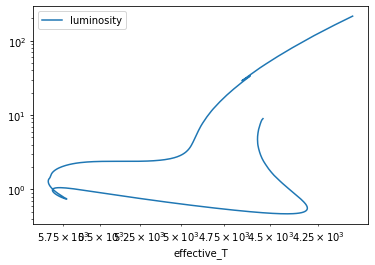

In [8]:
ax = df.plot(x='effective_T', y='luminosity')
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log');

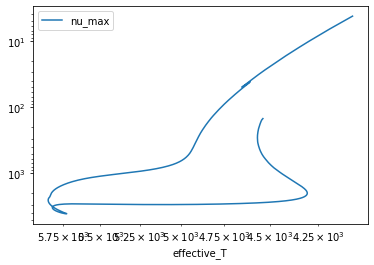

In [9]:
ax = df.plot(x='effective_T', y='nu_max')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_yscale('log');

In [10]:
import pygyre as pg

In [11]:
nuc = df['log_Lnuc'] - np.log10(df['luminosity']) > np.log10(0.999)

In [12]:
idx_min = df.loc[nuc].iloc[0].name

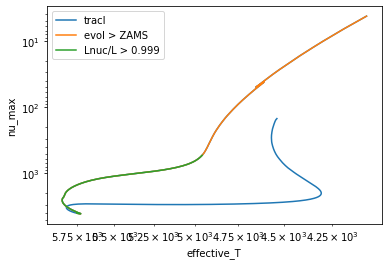

In [13]:
ax = df.plot(x='effective_T', y='nu_max', label='tracl')
ax = df.loc[idx_min:].plot(x='effective_T', y='nu_max', ax=ax, label='evol > ZAMS')
ax = df.loc[nuc].plot(x='effective_T', y='nu_max', ax=ax, label='Lnuc/L > 0.999')

# ax.plot(star['effective_T'], star['nu_max'], label='star')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('nu_max')
ax.legend();

In [14]:
def load_profile(filepath):
    """Loads a profile and converts to pandas."""
    profile = pg.read_model(filepath).to_pandas()
    return profile

def sound_speed(profile):
    """Calculates the adiabatic speed of sound across the profile."""
    return np.sqrt(profile['Gamma_1'] * profile['P'] / profile['rho'])

def acoustic_depth(profile):
    """Cumulatively integrates the acoustic depth, $tau = - \int_R^r dr/c$.
    
    Note:
        The profile goes radially out from the centre of the star, and thus must be reversed.
        Acoustic depth increases radially from the stellar surface.
    """
    return - integrate.cumtrapz(1/profile['c'].iloc[::-1], profile['r'].iloc[::-1], initial=0)[::-1]

def smooth(x, window):
    """Smooth y using a box kernel of size window."""
    box = np.ones(window)/window
    x_smooth = np.convolve(x, box, mode='same')
    return x_smooth

def plot_gamma(ax, profile, tau, tau_he, gamma_he, delta_he, tau_cz, gamma_cz):
    """Plot the first adiabatic exponant with the locations of the BCZ and HeII zones."""
    profile.plot(x='tau', y='Gamma_1', ax=ax)
    ax.plot(tau_cz, gamma_cz, linestyle='none', marker='o', label='BCZ')
    ax.plot(tau_he, gamma_he, marker='o', linestyle='none', label='HeII')
    ax.axvspan(tau.iloc[-1], tau.iloc[0], edgecolor='C0', facecolor='none', alpha=0.5, 
               hatch='//', label='4e4 < T/K < 2e5')
    ax.axvspan(tau_he-delta_he, tau_he+delta_he, color='C2', alpha=0.2, label=r'$2\Delta$')
    
    ax.set_xlabel('acoustic depth (s)')
    ax.set_ylabel('first adiabatic exponant')
    ax.legend()
    return ax

def plot_n2(ax, profile):
    """Plot the Brunt-Väisälä frequency squared."""
    profile.plot(x='tau', y='N^2', ax=ax)
    ax.set_xlabel('acoustic depth (s)')
    ax.set_ylabel('Brunt-Väisälä frequency squared (s-2)')
    ax.set_yscale('log')
#     ax.set_xscale('log')

def get_delta_cz(profile, tau, window_width=200.):
    """Gets the delta term for the BCZ from the max-min of d2ln(rho)/dr2 about tau_cz.
    mult
    """
    drho_dr = np.gradient(np.log(profile['rho']), profile['r'])
    d2rho_dr2 = np.gradient(drho_dr, profile['r'])
#     mask = (profile['tau'] > tau - window_width) & (profile['tau'] < tau + window_width)
#     diff = d2rho_dr2[mask]
    cz = profile['tau'] == tau
    sound_speed = profile.loc[cz, 'c'].iloc[0]
    # tau_cz will always be below true tau_cz due to methods above
    # Thus we can take the difference between the max and the gradient at tau_cz
#     delta = (diff.max() - d2rho_dr2[cz][0])
    
    g = np.gradient(d2rho_dr2*1e20, profile['r'])
    cond = np.abs(g) < 1e-9

    pre_cz = (profile['tau'] < tau) & (profile['tau'] > tau - window_width)
    p1 = np.polyfit(profile.loc[pre_cz & cond, 'r'], drho_dr[pre_cz & cond], 1)

    post_cz = (profile['tau'] > tau) & (profile['tau'] < tau + window_width)
    p2 = np.polyfit(profile.loc[post_cz & cond, 'r'], drho_dr[post_cz & cond], 1)
    
    delta = p2[0] - p1[0]
    return sound_speed, delta, 0.5 * sound_speed**2 * delta

def main(star, make_plots=False):
    filepath = os.path.join(data_dir, track_name, profile_dir, star['filename'])
    profile = load_profile(filepath)
    profile['c'] = sound_speed(profile)
    profile['tau'] = acoustic_depth(profile)
    profile['gamma_smooth'] = smooth(profile['Gamma_1'], 50)
    
    he_cond = (profile['T'] > 4e4) & (profile['T'] < 2e5)
    tau = profile.loc[he_cond, 'tau']
    gamma = profile.loc[he_cond, 'gamma_smooth']
    dgamma = np.gradient(gamma)
    dgamma2 = np.gradient(dgamma)
    mask = (dgamma > 0) & (dgamma2 > 0)
    
    tau_he = tau[mask].iloc[0]
    delta_he = tau_he - tau[mask].iloc[-1]
    gamma_he = profile[he_cond].loc[mask, 'Gamma_1'].iloc[0]
    gamma0 = 1.651
    Gamma_he = 2* delta_he * np.sqrt(2*np.pi) * (gamma0 - gamma_he) / (gamma0 + gamma_he)
    
    T = profile['tau'].iloc[0]
    amp_he = np.pi * Gamma_he / T # equation (16) Houdek & Gough (2007)
    
    idx_min = profile.loc[(profile['N^2'] > 0)].iloc[0].name  # First positive
#     dN2 = np.gradient(profile['N^2'])
    cz_cond = (profile['N^2'] < 0)  # & (dN2 < 0)
    
    tau_cz = profile[cz_cond].loc[idx_min:, 'tau'].iloc[0]
    gamma_cz = profile[cz_cond].loc[idx_min:, 'Gamma_1'].iloc[0]
#     c_cz, d_cz, delta_cz = get_delta_cz(profile, tau_cz)
#     amp_cz = delta_cz / 16 / np.pi**2 / T # see my derivation from Houdek & Gough (2007)
    # dnu_cz = amp_cz * delta_nu / nu**2 * sin(...)

#     tau_cz = profile.loc[cz_cond, 'tau'].iloc[0]
#     gamma_cz = profile.loc[cz_cond, 'Gamma_1'].iloc[0]
    
    if make_plots:
        fig, axes = plt.subplots(2, 1, figsize=(6.4, 8.0), sharex=True, gridspec_kw={'hspace': 0.05})
        plot_gamma(axes[0], profile, tau, tau_he, gamma_he, delta_he, tau_cz, gamma_cz)
        plot_n2(axes[1], profile)

    return pd.Series({
        'tau_he': tau_he,
        'delta_he': delta_he,
        'amp_he': amp_he,
        'tau_cz': tau_cz,
#         'delta_cz': delta_cz,
#         'amp_cz': amp_cz,
#         'c_cz': c_cz,
#         'd_cz': d_cz,
    })

Run for every 100th star and make plots.

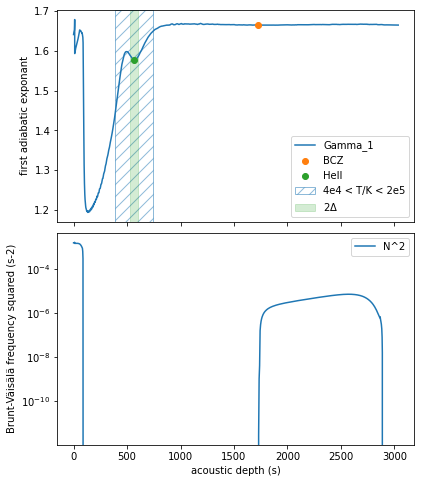

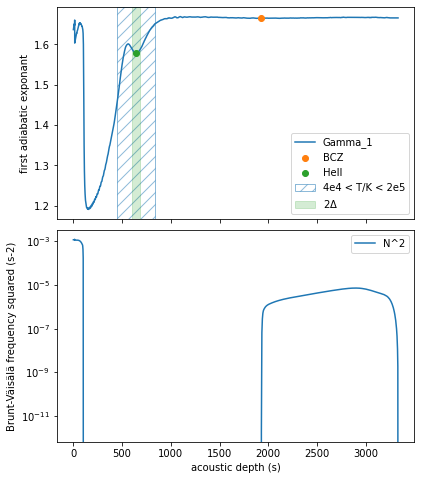

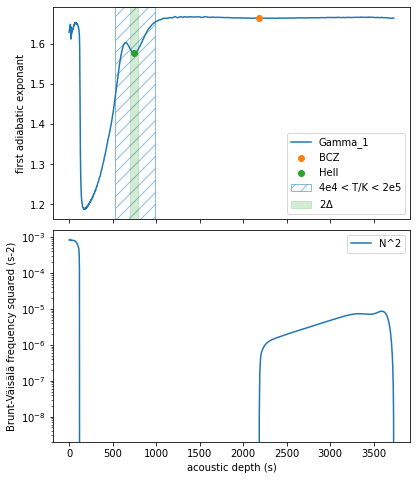

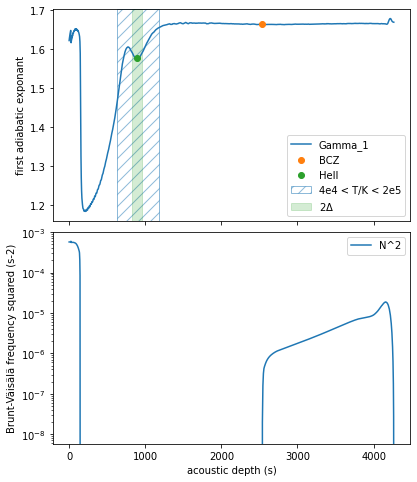

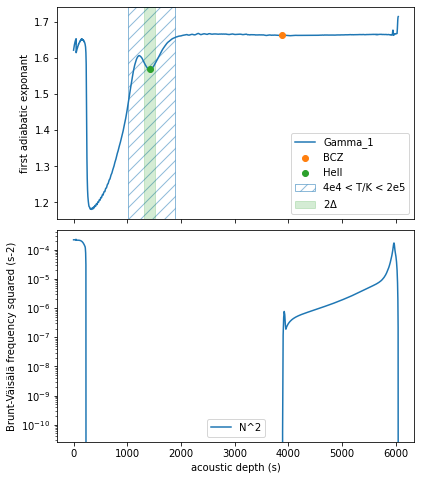

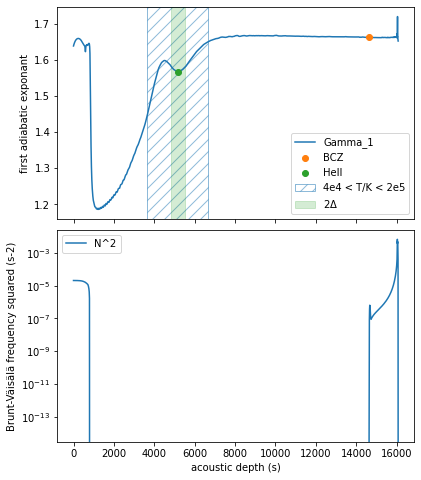

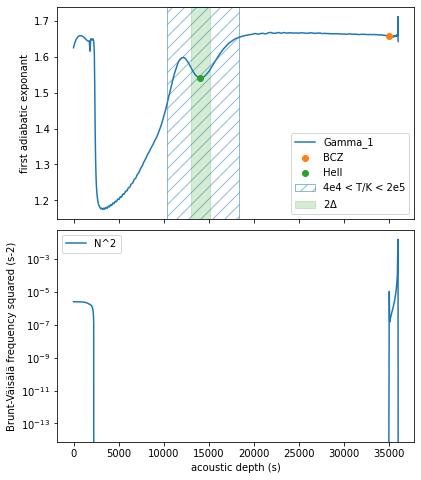

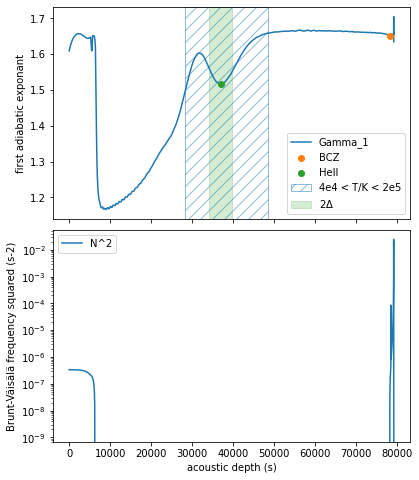

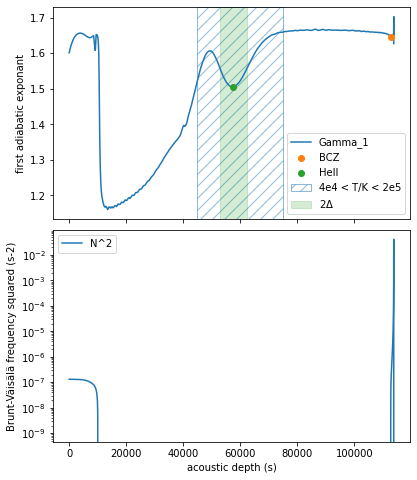

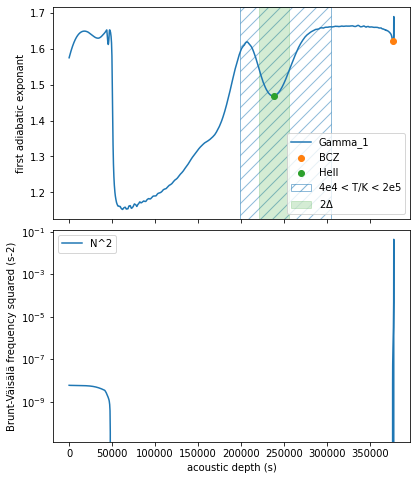

In [15]:
res = df.loc[idx_min:].iloc[::100].apply(main, axis=1, make_plots=True)

In [16]:
8*np.pi**2*res['delta_he']**2*1e-12

408     1.165905e-07
508     1.135468e-07
608     1.842140e-07
708     3.800464e-07
808     7.988932e-07
908     9.291156e-06
1008    8.451753e-05
1108    6.419107e-04
1208    1.762189e-03
1308    2.373145e-02
Name: delta_he, dtype: float64

In [17]:
(res['amp_he']*df['nu_max']*np.exp(
    - 8*np.pi**2*res['delta_he']**2*1e-12*df['nu_max']**2
)).dropna()

408     2.840357
508     3.526941
608     2.682454
708     1.401619
808     1.513035
908     0.557086
1008    0.273503
1108    0.154904
1208    0.103209
1308    0.076505
dtype: float64

In [39]:
idx = 908
nu_max = df.loc[idx, 'nu_max']
delta_nu = df.loc[idx, 'delta_nu']
num_points = 250
nu = np.linspace(nu_max - 6*delta_nu, nu_max + 6*delta_nu, num_points)

In [40]:
phi_he = 0.0
b_he = 8*np.pi**2*res.loc[idx, 'delta_he']**2*1e-12
amp_he = res.loc[idx, 'amp_he']*nu*np.exp(- b_he*nu**2)
dnu_he = amp_he * np.sin(4*np.pi*res.loc[idx, 'tau_he']*1e-6*nu + phi_he)

In [43]:
phi_cz = 0.0
amp_cz = 0.1
dnu_cz = amp_cz * np.sin(4*np.pi*res.loc[idx, 'tau_cz']*1e-6*nu + phi_cz)

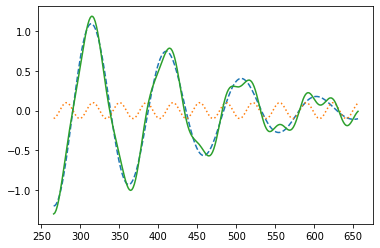

In [44]:
plt.plot(nu, dnu_he, '--')
plt.plot(nu, dnu_cz, ':')
plt.plot(nu, dnu_cz+dnu_he)

Run for every 10th star without plots.

In [131]:
res = df.loc[nuc].iloc[::10].apply(main, axis=1)

Join result to the main DataFrame.

In [132]:
df = df.join(res)

Add a column for the difference between acoustic depths.

In [133]:
df['delta_tau'] = df['tau_cz'] - df['tau_he']

## Plots

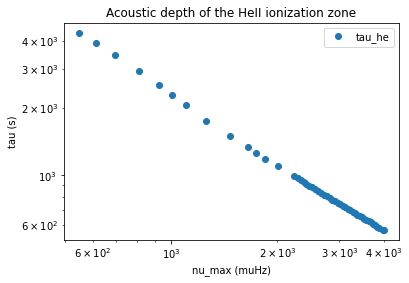

In [134]:
ax = df.plot(x='nu_max', y='tau_he', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('tau (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Acoustic depth of the HeII ionization zone');

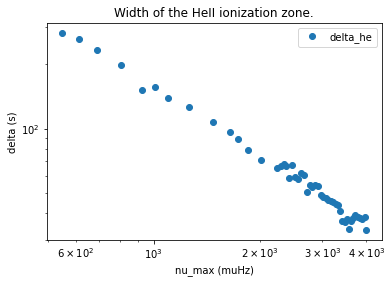

In [135]:
ax = df.plot(x='nu_max', y='delta_he', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('delta (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Width of the HeII ionization zone.');

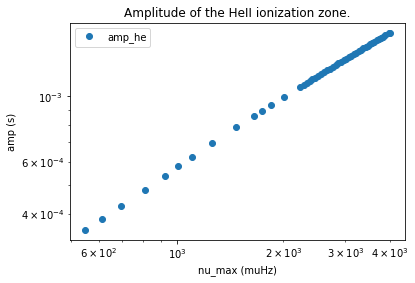

In [136]:
ax = df.plot(x='nu_max', y='amp_he', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('amp (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Amplitude of the HeII ionization zone.');

The amplitude term correlates strongly with nu_max. But we want to know if for a given nu_max but different Y whether the amplitude changes.

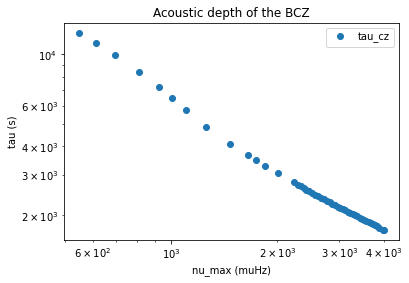

In [137]:
ax = df.plot(x='nu_max', y='tau_cz', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('tau (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Acoustic depth of the BCZ');

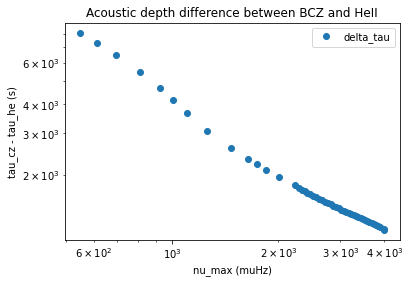

In [138]:
ax = df.plot(x='nu_max', y='delta_tau', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('tau_cz - tau_he (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Acoustic depth difference between BCZ and HeII');

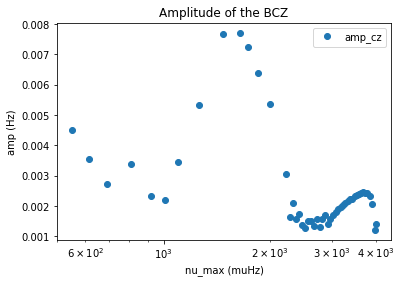

In [147]:
ax = df.plot(x='nu_max', y='amp_cz', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('amp (Hz)')
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Amplitude of the BCZ');

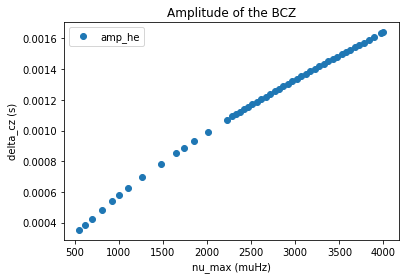

In [149]:
ax = df.plot(x='nu_max', y='amp_he', linestyle='none', marker='o')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('delta_cz (s)')
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_title('Amplitude of the BCZ');

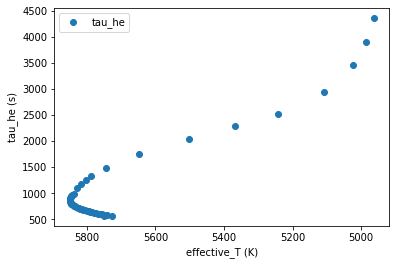

In [41]:
ax = df.plot(x='effective_T', y='tau_he', linestyle='none', marker='o')
ax.set_xlabel('effective_T (K)')
ax.set_ylabel('tau_he (s)')
ax.invert_xaxis()

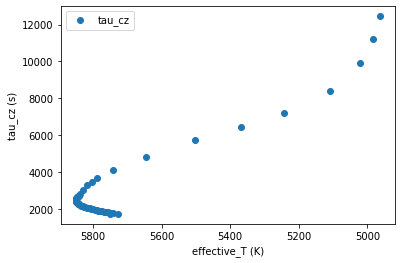

In [42]:
ax = df.plot(x='effective_T', y='tau_cz', linestyle='none', marker='o')
ax.set_xlabel('effective_T (K)')
ax.set_ylabel('tau_cz (s)')
ax.invert_xaxis()

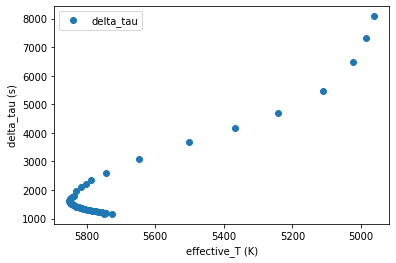

In [43]:
ax = df.plot(x='effective_T', y='delta_tau', linestyle='none', marker='o')
ax.set_xlabel('effective_T (K)')
ax.set_ylabel('delta_tau (s)')
ax.invert_xaxis()

In [44]:
tau_over_numax = (df['tau_he'] / df['nu_max'])

Text(0, 0.5, 'tau_he (s)')

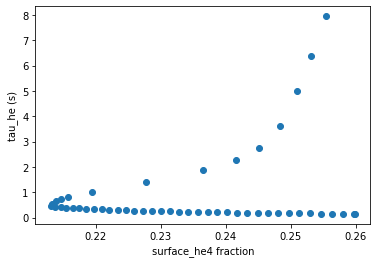

In [70]:
fig, ax = plt.subplots()

ax.plot(df['surface_he4'], tau_over_numax, linestyle='none', marker='o')
ax.set_xlabel('surface_he4 fraction')
ax.set_ylabel('tau_he (s)')

Text(0, 0.5, 'delta_he (s)')

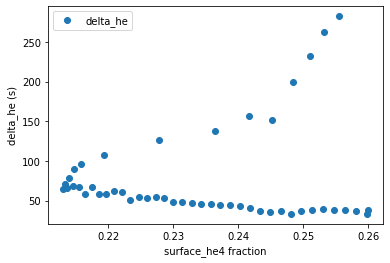

In [71]:
ax = df.plot(x='surface_he4', y='delta_he', linestyle='none', marker='o')
ax.set_xlabel('surface_he4 fraction')
ax.set_ylabel('delta_he (s)')

## Power law

It looks like $\nu_\max$ is a good predictor of $\tau$.

In [111]:
def model(x, a, b):
    return a + b * x

mask = df['tau_he'].notna()
xdata = np.log10(df.loc[mask, 'nu_max'])
ydata = np.log10(df.loc[mask, 'tau_he'])
p0 = [7., -1.]

popt, pcov = optimize.curve_fit(model, xdata, ydata, p0=p0)

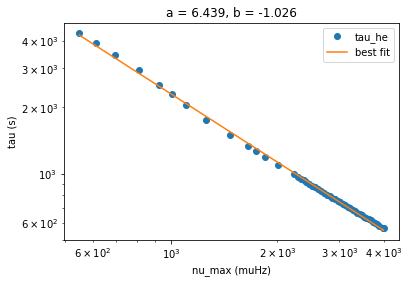

In [112]:
log_tau = model(xdata, *popt)

ax = df.plot(x='nu_max', y='tau_he', linestyle='none', marker='o')
ax.plot(10**xdata, 10**log_tau, label='best fit')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('tau (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title(f'a = {popt[0]:.3f}, b = {popt[1]:.3f}');

In [113]:
mask = df['tau_cz'].notna()
ydata = np.log10(df.loc[mask, 'tau_cz'])

popt, pcov = optimize.curve_fit(model, xdata, ydata, p0=p0)

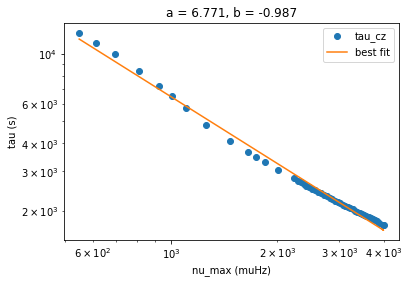

In [114]:
log_tau = model(xdata, *popt)

ax = df.plot(x='nu_max', y='tau_cz', linestyle='none', marker='o')
ax.plot(10**xdata, 10**log_tau, label='best fit')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('tau (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title(f'a = {popt[0]:.3f}, b = {popt[1]:.3f}');

In [115]:
mask = df['delta_he'].notna()
ydata = np.log10(df.loc[mask, 'delta_he'])

popt, pcov = optimize.curve_fit(model, xdata, ydata, p0=p0)

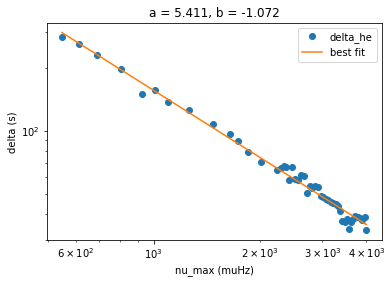

In [116]:
log_tau = model(xdata, *popt)

ax = df.plot(x='nu_max', y='delta_he', linestyle='none', marker='o')
ax.plot(10**xdata, 10**log_tau, label='best fit')
ax.set_xlabel('nu_max (muHz)')
ax.set_ylabel('delta (s)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_title(f'a = {popt[0]:.3f}, b = {popt[1]:.3f}');